In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

In [3]:
# For notebook aesthetics
warnings.filterwarnings('ignore')
#sns.set(style="whitegrid")

In [4]:
df = pd.read_csv(r"data\healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   str    
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   str    
 6   work_type          5110 non-null   str    
 7   Residence_type     5110 non-null   str    
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   str    
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), str(5)
memory usage: 479.2 KB


In [6]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

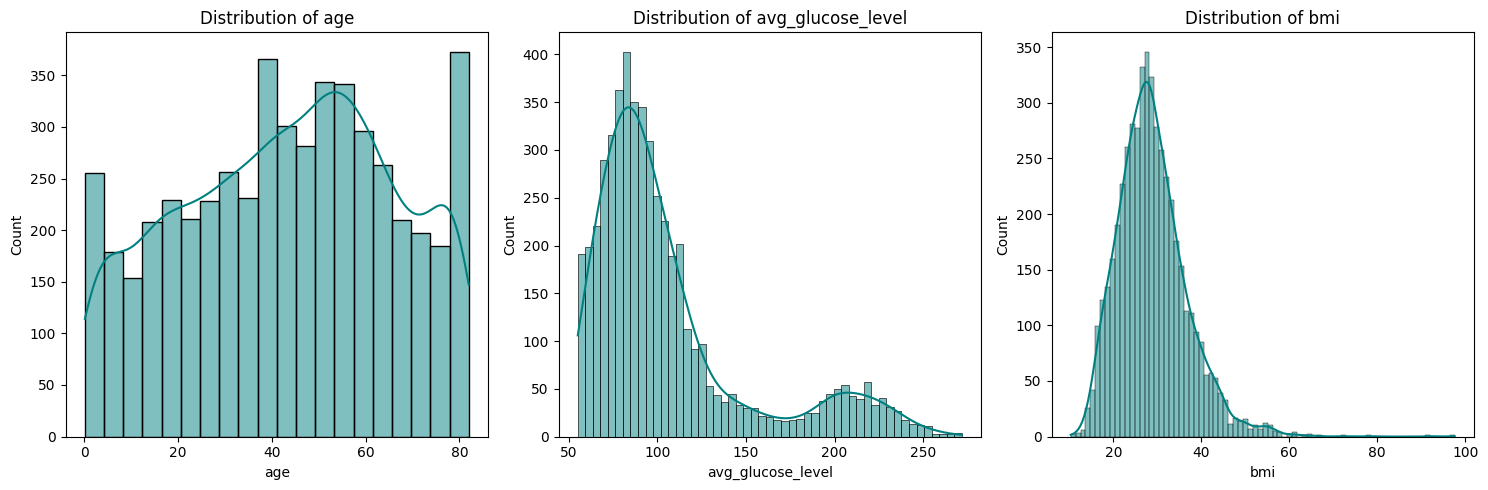

In [9]:
num_cols = ['age', 'avg_glucose_level', 'bmi']

plt.figure(figsize=(15, 5))
for i, col in enumerate(num_cols):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], kde=True, color='teal')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

`avg_glucose_level` is right skewed.
So, we better apply log transformation to help models perform better

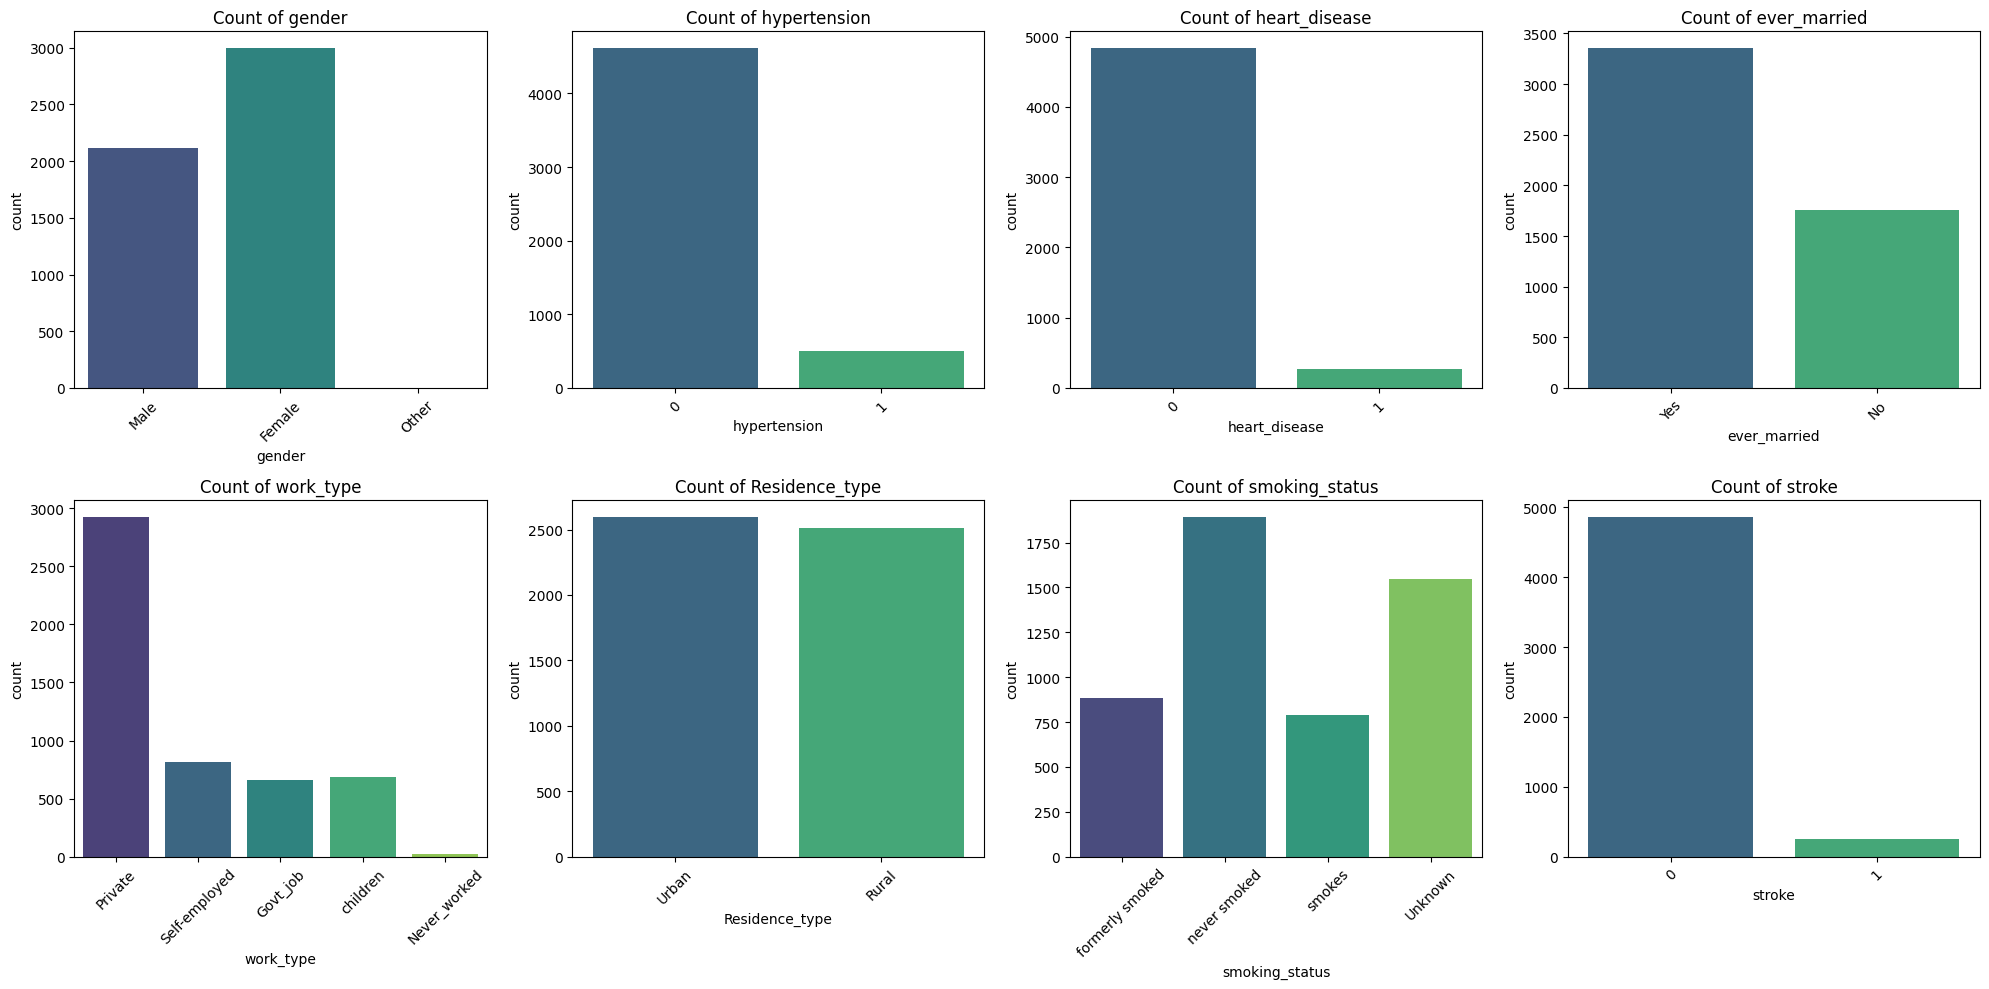

In [10]:
cat_cols = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']

plt.figure(figsize=(20, 10))
for i, col in enumerate(cat_cols):
    plt.subplot(2, 4, i+1)
    sns.countplot(x=col, data=df, palette='viridis')
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

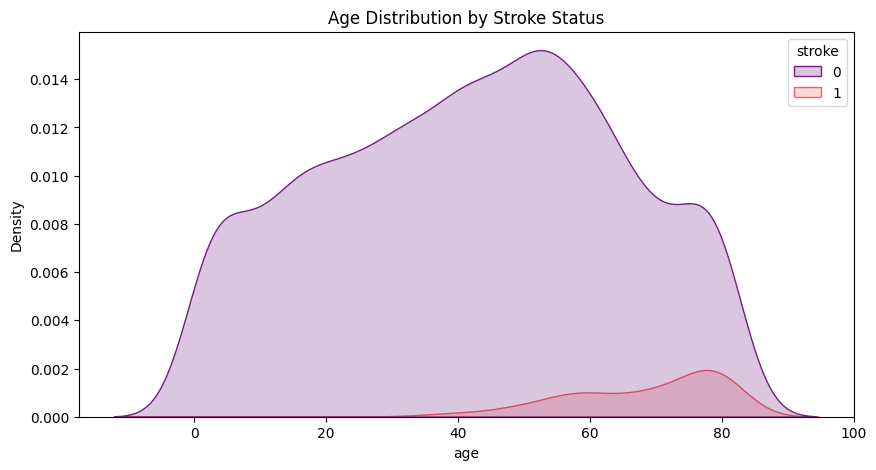

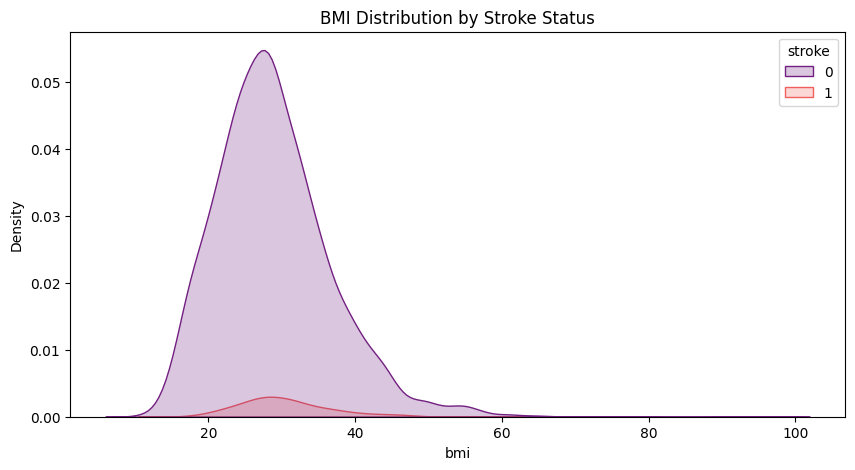

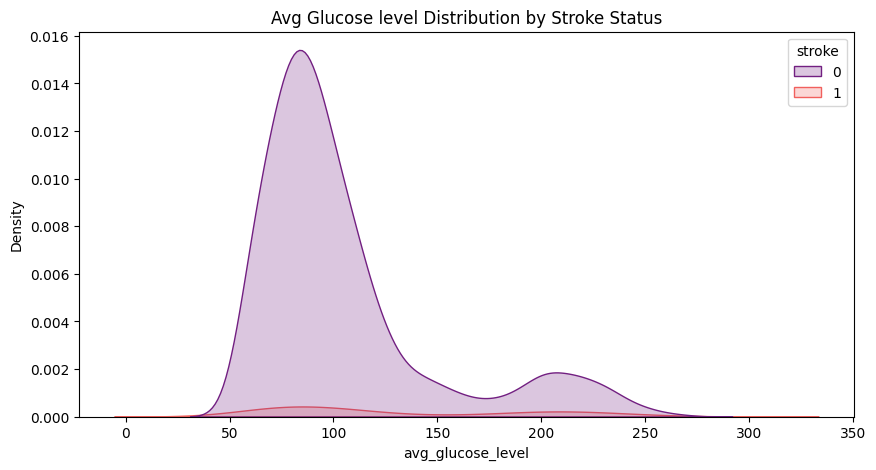

In [11]:
# Age vs Stroke
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df, x='age', hue='stroke', fill=True, palette='magma')
plt.title('Age Distribution by Stroke Status')
plt.show()

# BMI vs Stroke
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df, x='bmi', hue='stroke', fill=True, palette='magma')
plt.title('BMI Distribution by Stroke Status')
plt.show()

# Avg Glucose vs Stroke
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df, x='avg_glucose_level', hue='stroke', fill=True, palette='magma')
plt.title('Avg Glucose level Distribution by Stroke Status')
plt.show()

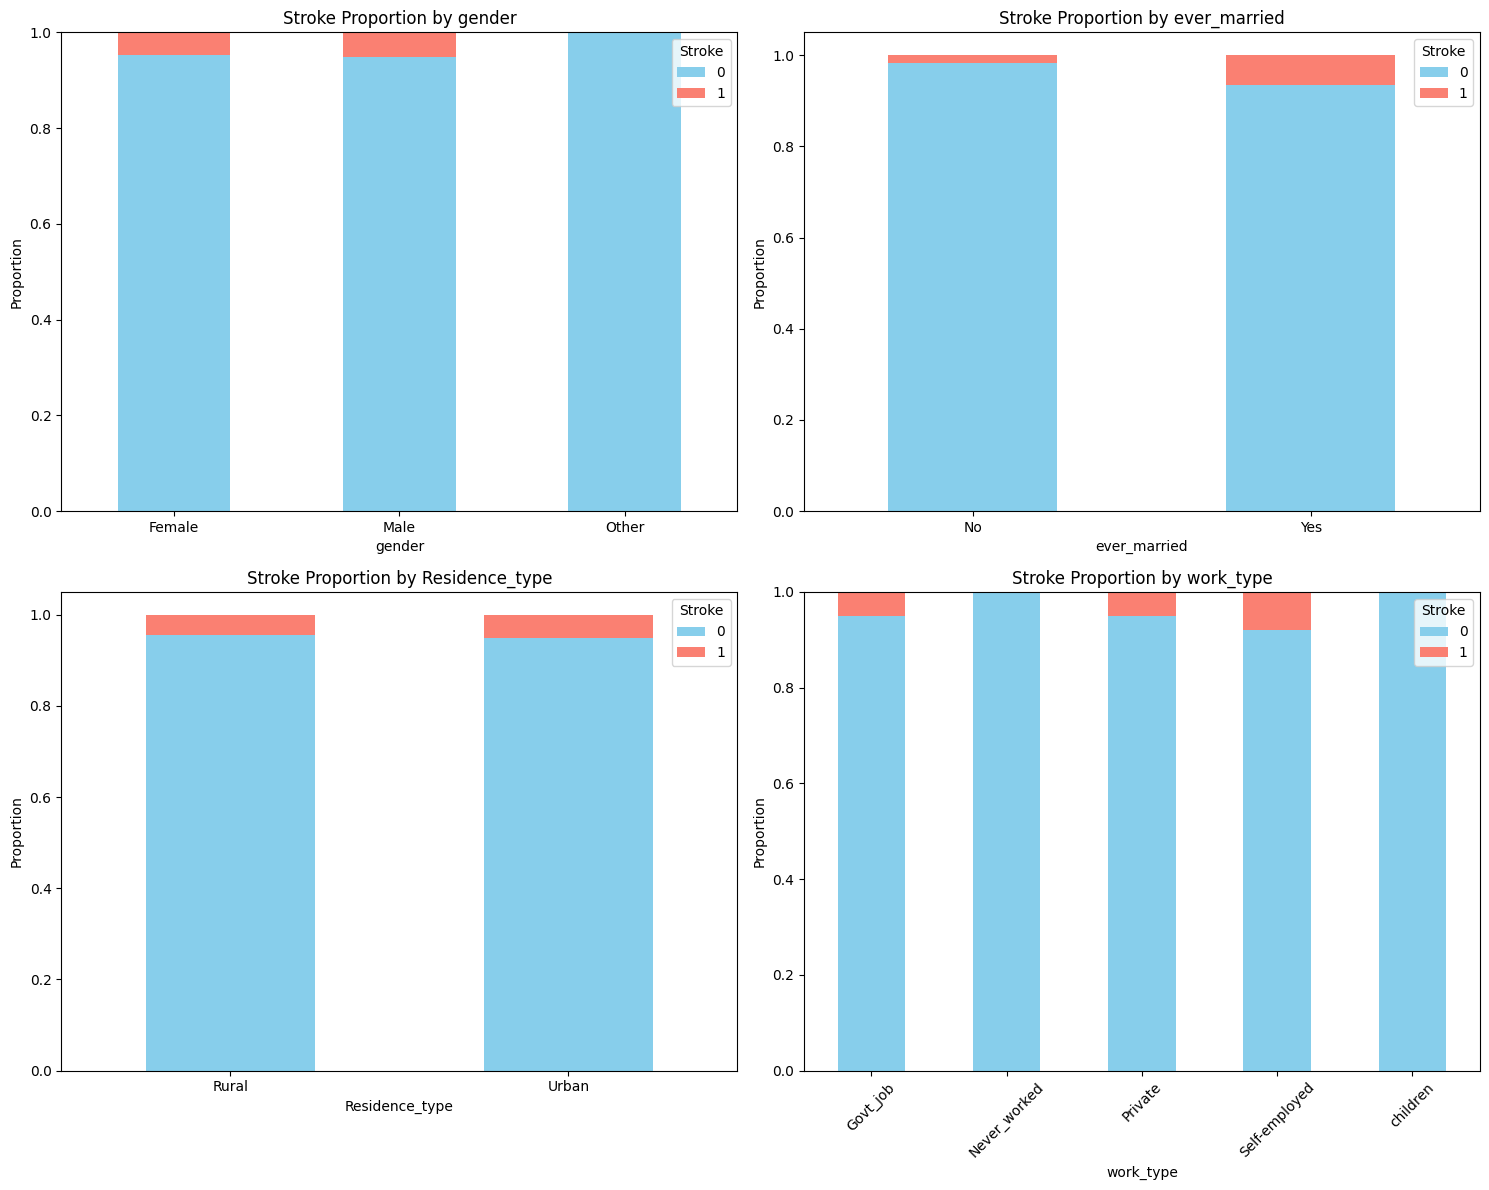

In [12]:
# List of demographic features to analyze
demo_features = ['gender', 'ever_married', 'Residence_type', 'work_type']

# Create a figure with subplots (2 rows, 2 columns)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(demo_features):
    # 1. Normalize cross-tab to get percentages
    cross_tab_prop = pd.crosstab(df[col], df['stroke'], normalize='index')
    
    # 2. Plot Stacked Bar Chart on the specific subplot axis
    cross_tab_prop.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], ax=axes[i])
    
    axes[i].set_title(f'Stroke Proportion by {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Proportion')
    axes[i].tick_params(axis='x', rotation=0 if col != 'work_type' else 45)
    axes[i].legend(title='Stroke', loc='upper right')

plt.tight_layout()
plt.show()

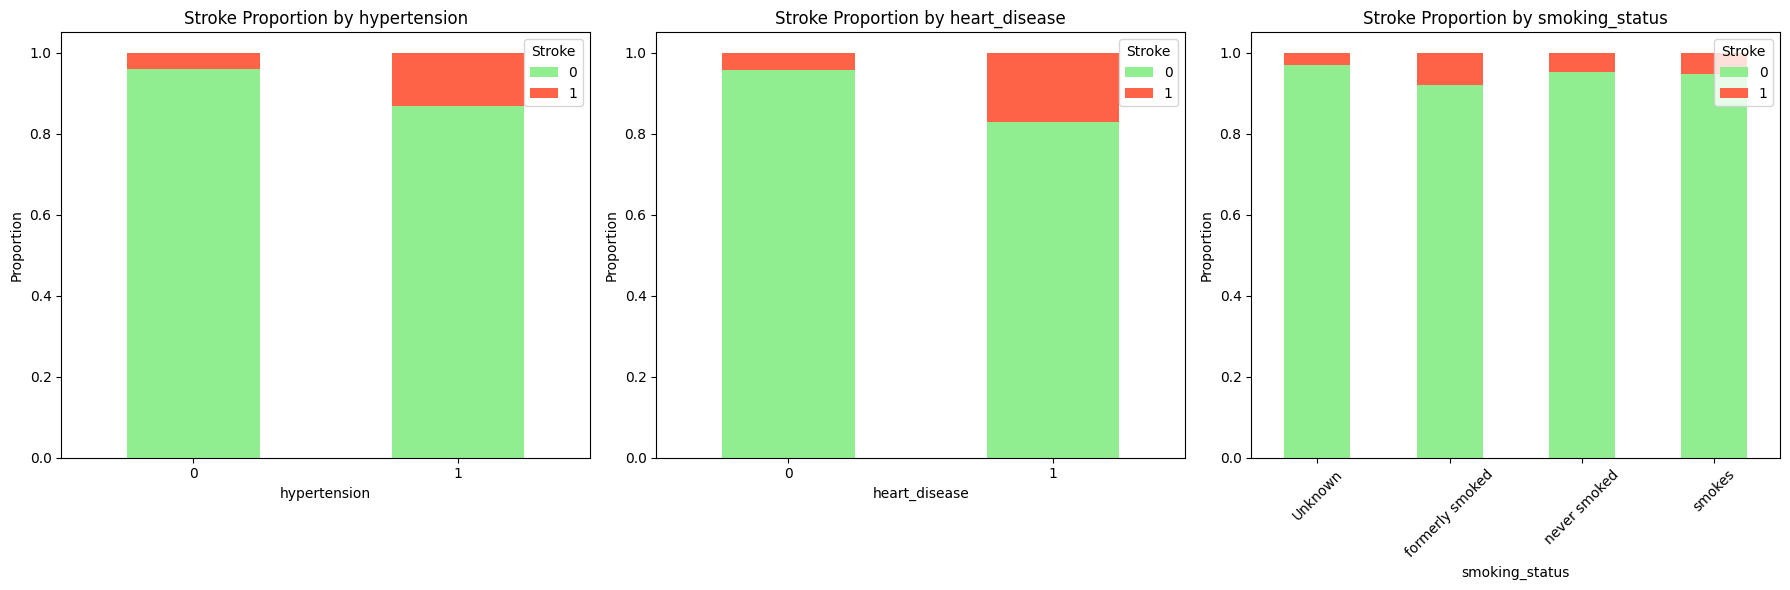

In [13]:
# List of health-related features
health_features = ['hypertension', 'heart_disease', 'smoking_status']

# Create a figure with subplots (1 row, 3 columns)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

for i, col in enumerate(health_features):
    # 1. Normalize cross-tab to get percentages
    cross_tab_prop = pd.crosstab(df[col], df['stroke'], normalize='index')
    
    # 2. Plot Stacked Bar Chart
    cross_tab_prop.plot(kind='bar', stacked=True, color=['lightgreen', 'tomato'], ax=axes[i])
    
    axes[i].set_title(f'Stroke Proportion by {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Proportion')
    axes[i].tick_params(axis='x', rotation=45 if col == 'smoking_status' else 0)
    axes[i].legend(title='Stroke', loc='upper right')

plt.tight_layout()
plt.show()

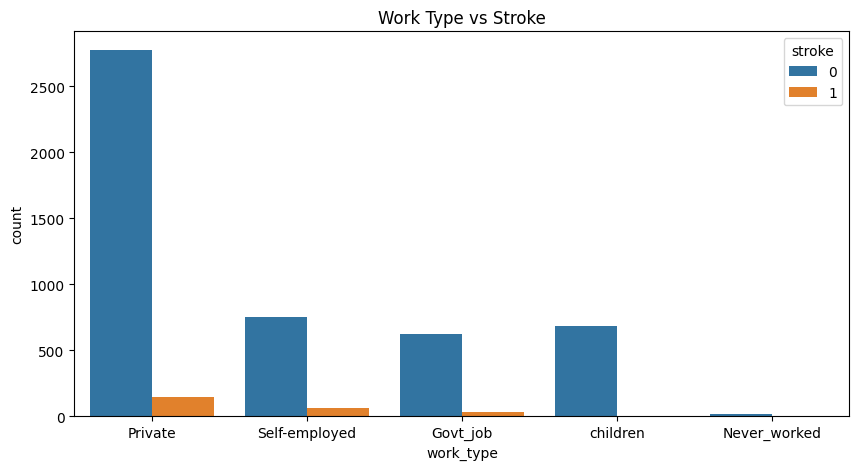

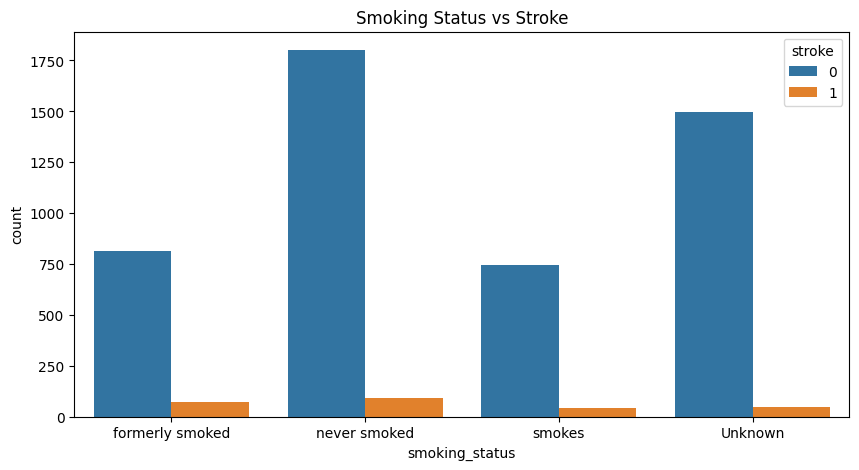

In [14]:
# Work Type vs Stroke
plt.figure(figsize=(10, 5))
sns.countplot(x='work_type', hue='stroke', data=df)
plt.title('Work Type vs Stroke')
plt.show()

# Smoking Status vs Stroke
plt.figure(figsize=(10, 5))
sns.countplot(x='smoking_status', hue='stroke', data=df)
plt.title('Smoking Status vs Stroke')
plt.show()

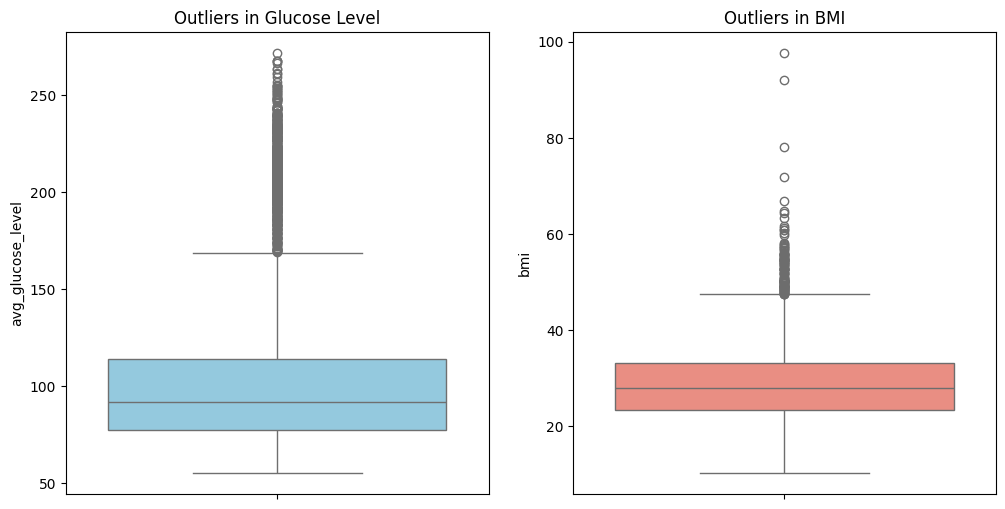

In [15]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['avg_glucose_level'], color='skyblue')
plt.title('Outliers in Glucose Level')
plt.subplot(1, 2, 2)
sns.boxplot(y=df['bmi'], color='salmon')
plt.title('Outliers in BMI')
plt.show()

In [16]:
# Check correlation of BMI with other numeric variables
print("Correlation of BMI with other variables:")
print(df[['age', 'avg_glucose_level', 'bmi']].corr()['bmi'])

Correlation of BMI with other variables:
age                  0.333398
avg_glucose_level    0.175502
bmi                  1.000000
Name: bmi, dtype: float64


In [17]:
# Since correlations are usually moderate (~0.3 for age), 
# Median imputation is the safest standard.
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

In [18]:
# Confirm no missing values remain
print(f"\nMissing values in BMI: {df['bmi'].isnull().sum()}")


Missing values in BMI: 0


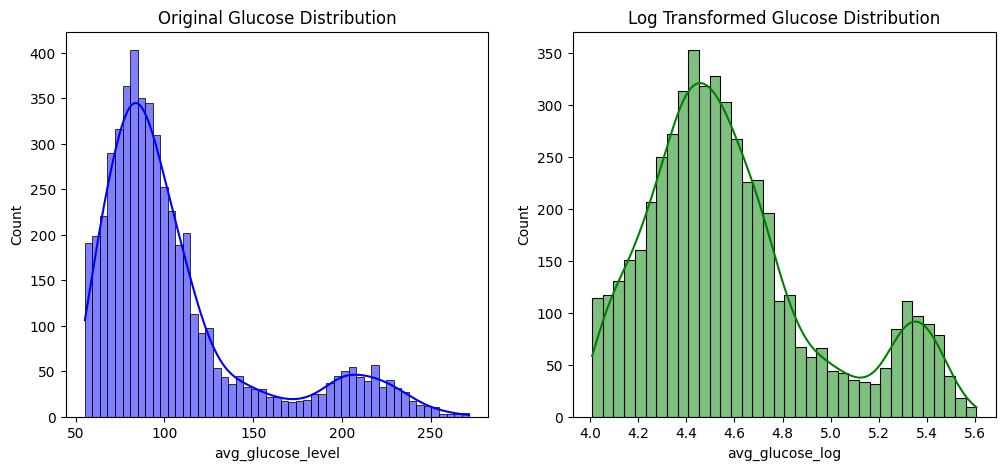

In [19]:
# Apply Log Transformation to Glucose
df['avg_glucose_log'] = np.log(df['avg_glucose_level'])

# Visualize the change
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['avg_glucose_level'], kde=True, color='blue')
plt.title('Original Glucose Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['avg_glucose_log'], kde=True, color='green')
plt.title('Log Transformed Glucose Distribution')
plt.show()

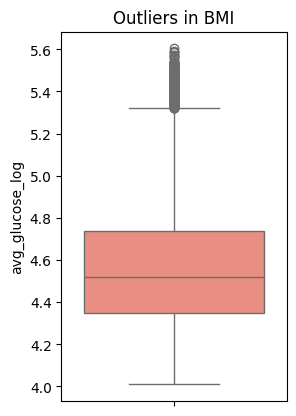

In [20]:
plt.subplot(1, 2, 2)
sns.boxplot(y=df['avg_glucose_log'], color='salmon')
plt.title('Outliers in BMI')
plt.show()

In [21]:
def handle_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Capping values
    data[column] = np.where(data[column] > upper_bound, upper_bound, 
                           np.where(data[column] < lower_bound, lower_bound, data[column]))
    return data

In [22]:
# Apply to BMI and Glucose
df = handle_outliers(df, 'bmi')
df = handle_outliers(df, 'avg_glucose_level')
df = handle_outliers(df, 'avg_glucose_log')

print("Outliers capped for BMI and Glucose.")

Outliers capped for BMI and Glucose.


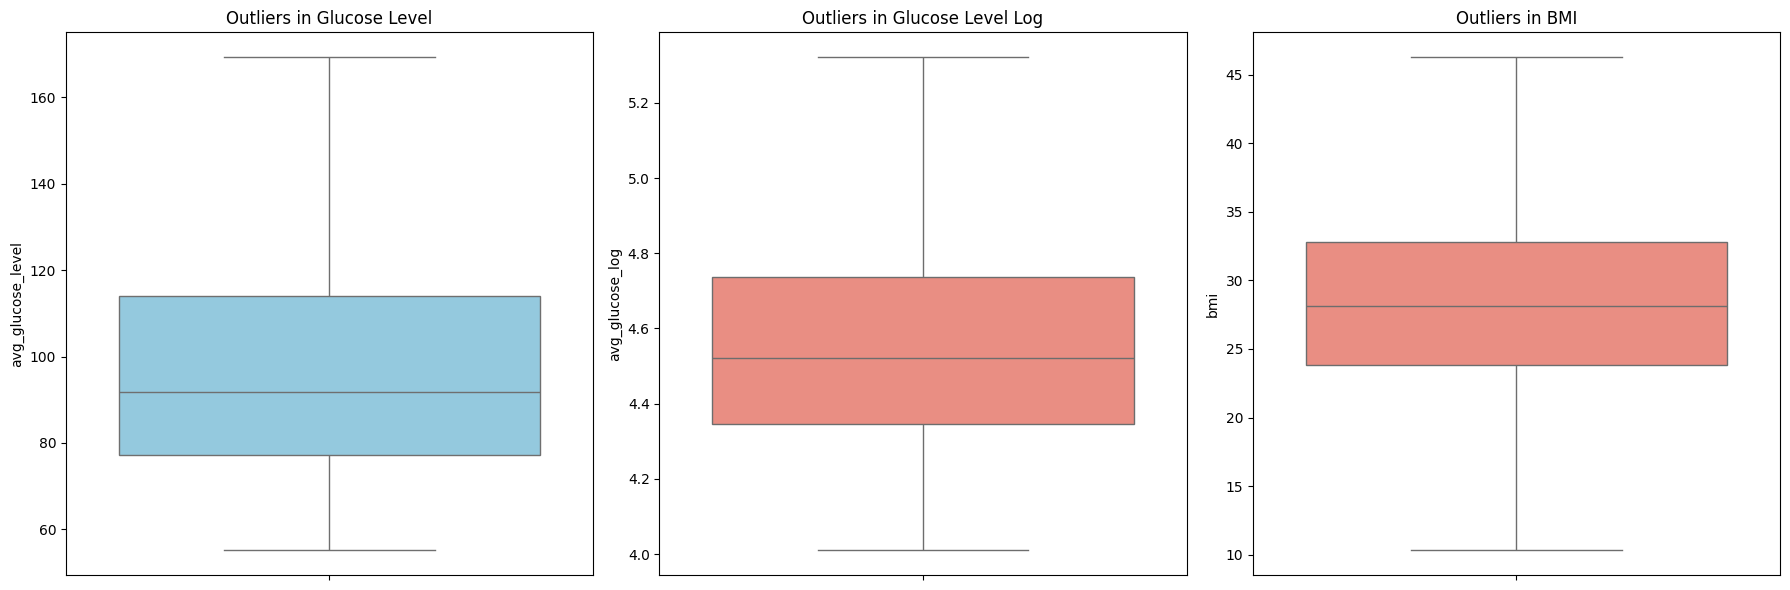

In [23]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
sns.boxplot(y=df['avg_glucose_level'], color='skyblue')
plt.title('Outliers in Glucose Level')

plt.subplot(1, 3, 2)
sns.boxplot(y=df['avg_glucose_log'], color='salmon')
plt.title('Outliers in Glucose Level Log')

plt.subplot(1, 3, 3)
sns.boxplot(y=df['bmi'], color='salmon')
plt.title('Outliers in BMI')

plt.tight_layout() 
plt.show()


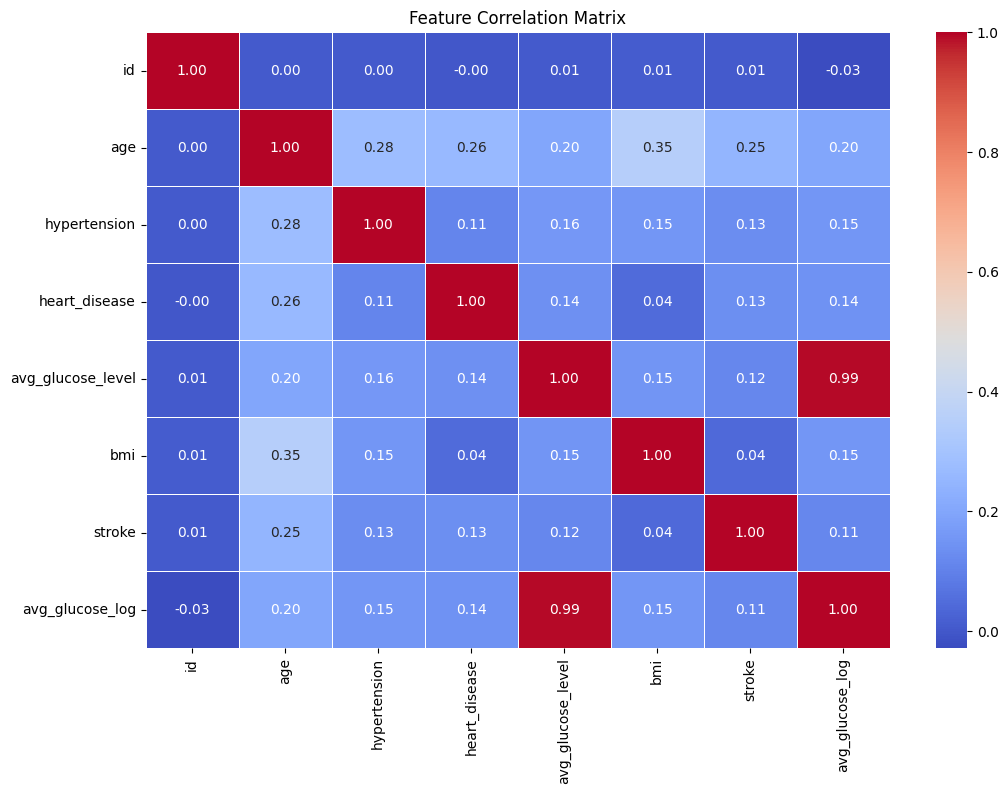

In [24]:
plt.figure(figsize=(12, 8))
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

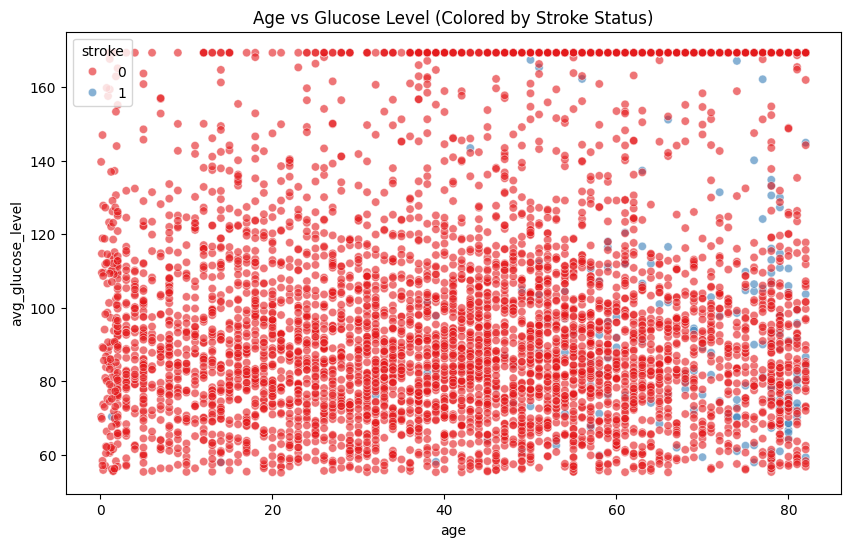

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='avg_glucose_level', hue='stroke', alpha=0.6, palette='Set1')
plt.title('Age vs Glucose Level (Colored by Stroke Status)')
plt.show()

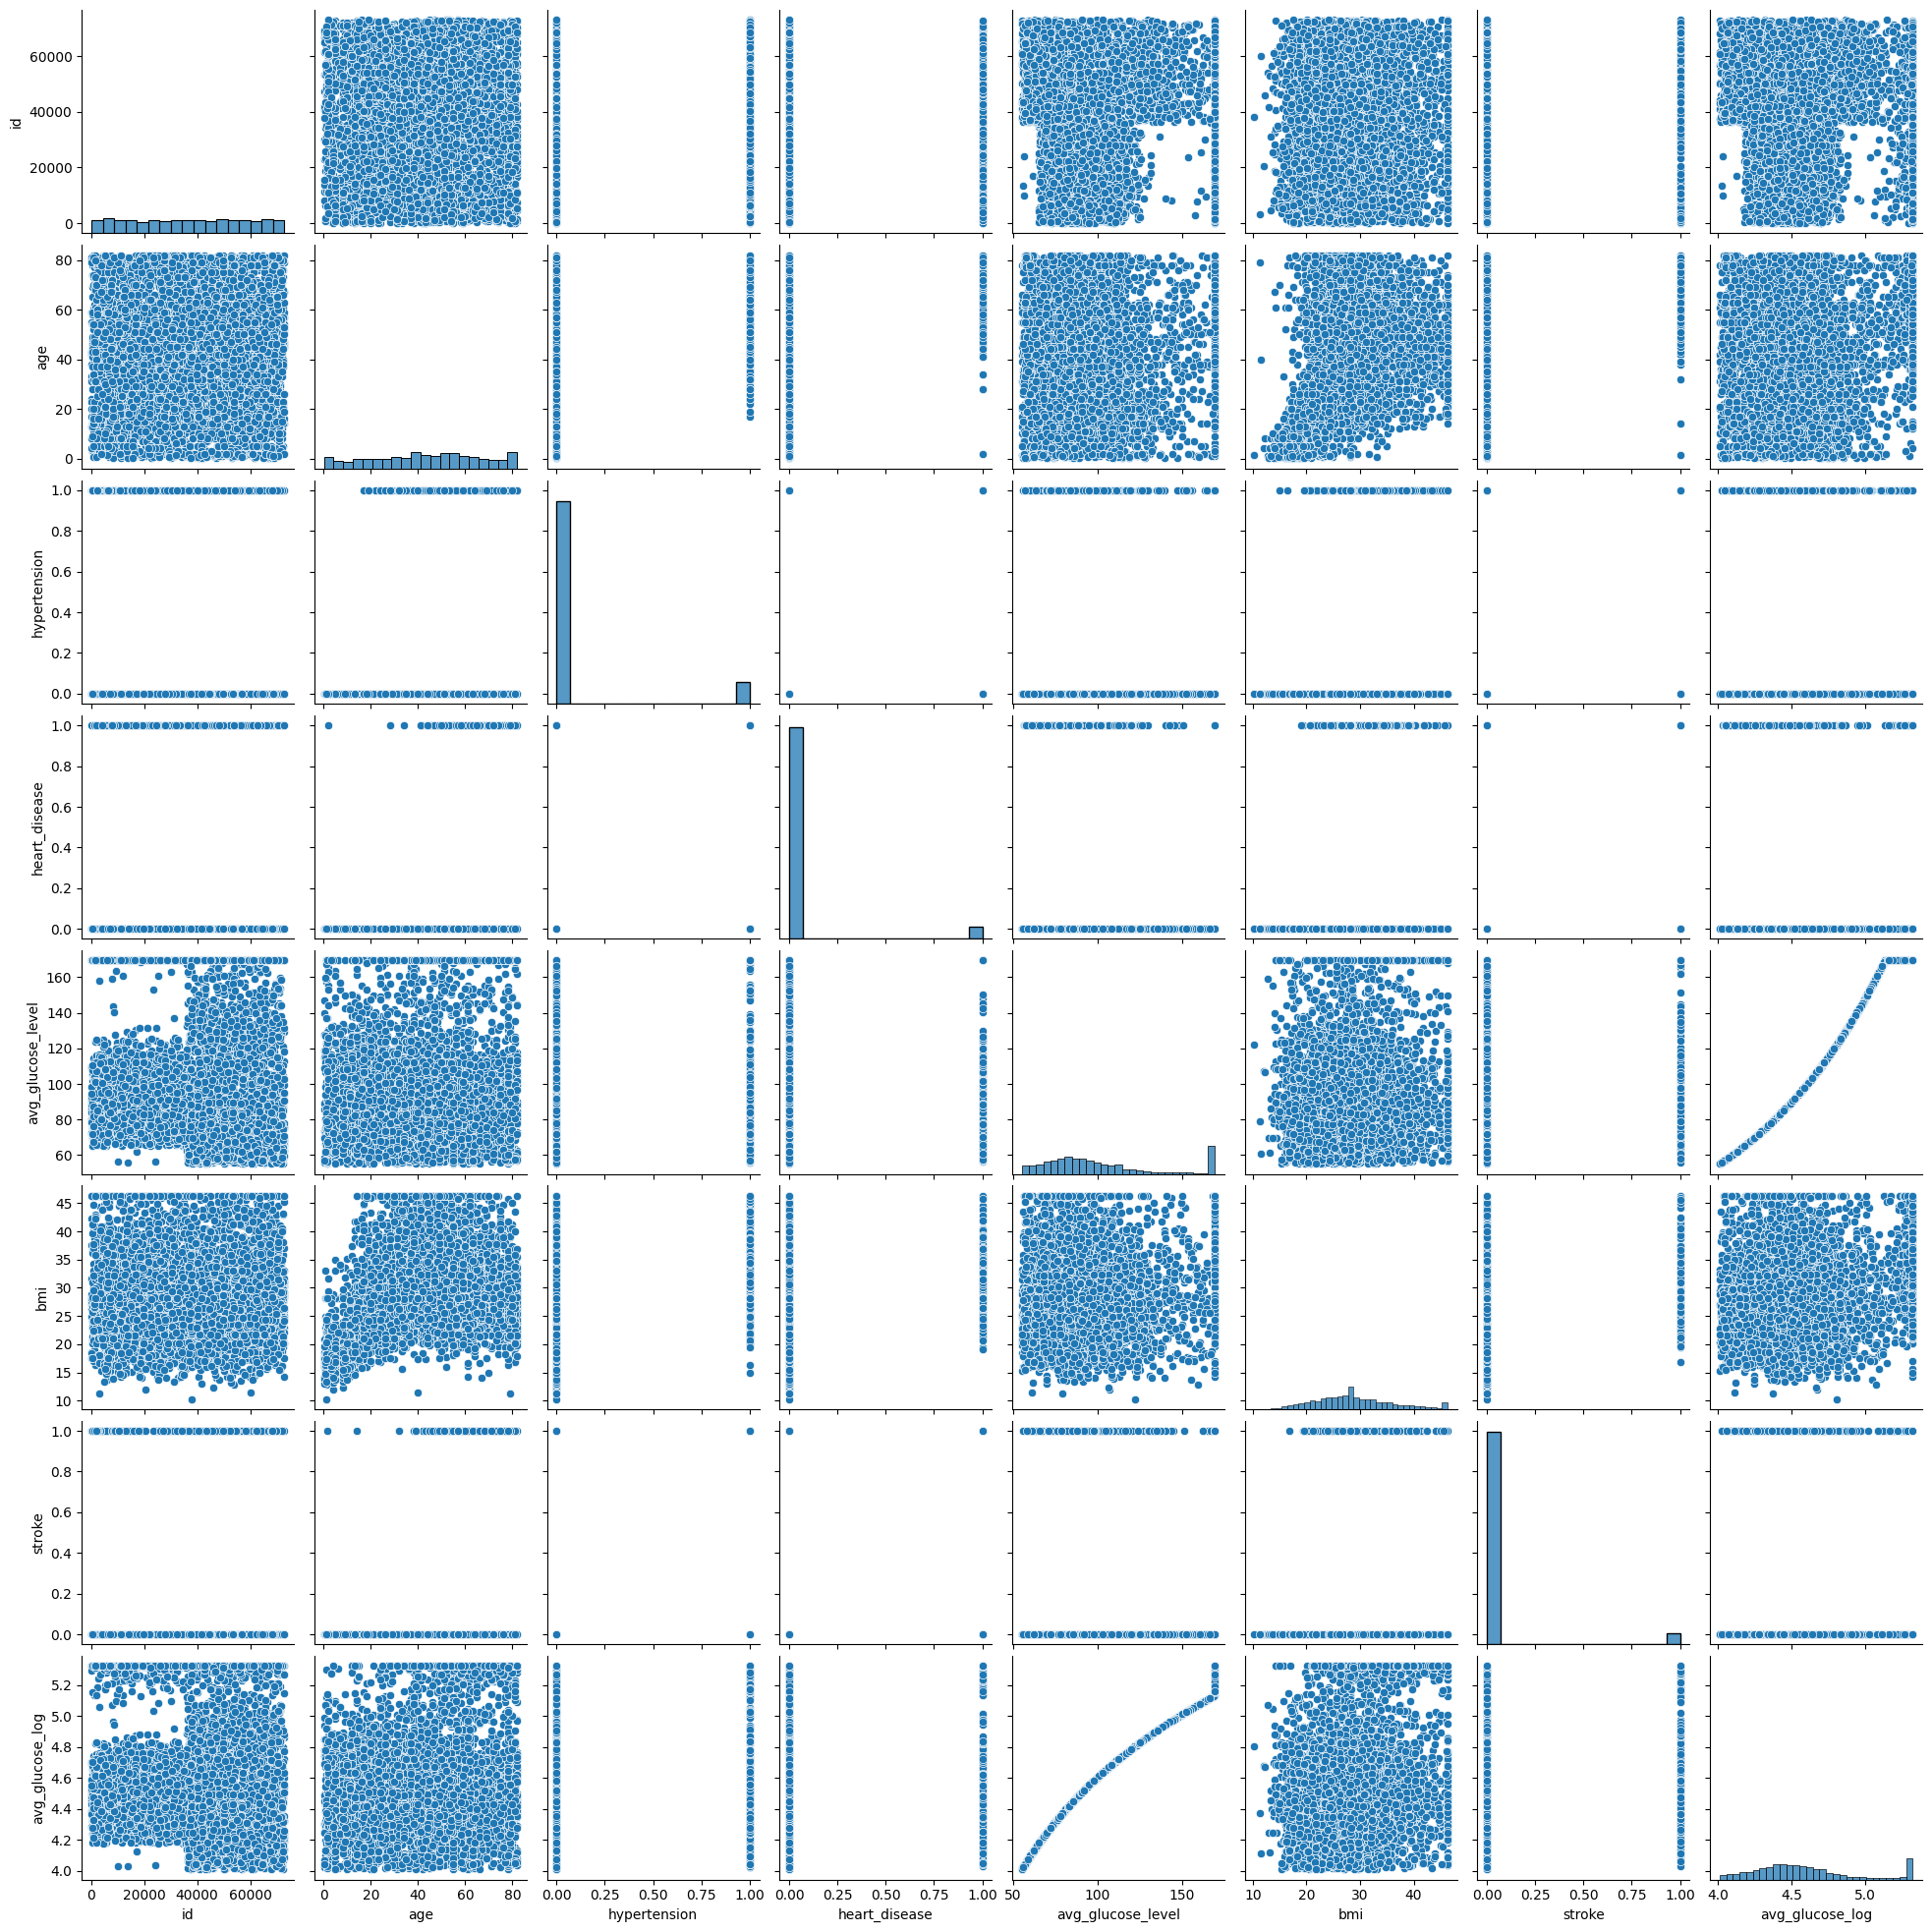

In [78]:
sns.pairplot(df)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import joblib

# 1. Define Features (Choosing 'avg_glucose_log' as discussed)
# Target: 'stroke'
X = df.drop(['stroke', 'avg_glucose_level'], axis=1) # Drop original glucose
y = df['stroke']

# 2. Identify Column Types
numeric_features = ['age', 'hypertension', 'heart_disease', 'bmi', 'avg_glucose_log']
categorical_features = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# 3. Create Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# 4. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 5. Fit & Transform
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Save preprocessor for the app
joblib.dump(preprocessor, 'preprocessor.joblib')
print("Preprocessing complete. Train/Test sets ready.")

Preprocessing complete. Train/Test sets ready.


In [27]:
import json
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import (accuracy_score, roc_auc_score, precision_score, 
                             recall_score, f1_score, matthews_corrcoef, confusion_matrix)

    

# Initialize the master metadata
model_metadata = {"models": {}}

def update_metadata(name, params, metrics, history, path):
    model_metadata["models"][name] = {
        "parameters": params,
        "final_metrics": metrics,
        "training_history": history,
        "model_path": path
    }
    with open('model_metadata.json', 'w') as f:
        json.dump(model_metadata, f, indent=4)

def plot_training_curve(history, title):
    plt.figure(figsize=(8, 4))
    plt.plot(history['epoch'], history['train_acc'], label='Train Accuracy')
    if 'val_acc' in history:
        plt.plot(history['epoch'], history['val_acc'], label='Val Accuracy')
    plt.title(f'Training Curve: {title}')
    plt.xlabel('Epoch / Iteration')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

def get_metrics(y_true, y_pred, y_prob):
    return {
        "Accuracy": round(accuracy_score(y_true, y_pred), 4),
        "AUC": round(roc_auc_score(y_true, y_prob), 4),
        "Precision": round(precision_score(y_true, y_pred), 4),
        "Recall": round(recall_score(y_true, y_pred), 4),
        "F1": round(f1_score(y_true, y_pred), 4),
        "MCC": round(matthews_corrcoef(y_true, y_pred), 4)
    }

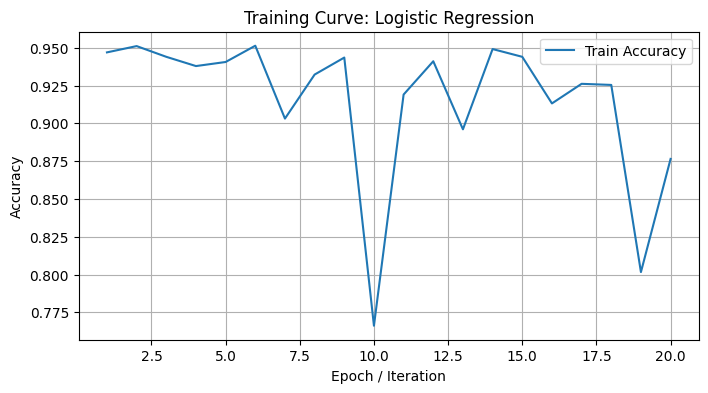

In [28]:
from sklearn.linear_model import SGDClassifier
import numpy as np

model_name = "Logistic Regression"
# Use SGD for partial_fit (epoch simulation)
clf = SGDClassifier(loss='log_loss', max_iter=1)
epochs = 20
history = {'epoch': [], 'train_acc': []}

# Split training data into 10 chunks to simulate epochs
X_chunks = np.array_split(X_train_transformed, epochs)
y_chunks = np.array_split(y_train, epochs)

for i in range(epochs):
    clf.partial_fit(X_chunks[i], y_chunks[i], classes=np.unique(y_train))
    history['epoch'].append(i+1)
    history['train_acc'].append(clf.score(X_train_transformed, y_train))

# Final Eval
y_pred = clf.predict(X_test_transformed)
y_prob = clf.predict_proba(X_test_transformed)[:, 1]
metrics = get_metrics(y_test, y_pred, y_prob)

plot_training_curve(history, model_name)
joblib.dump(clf, 'logistic_regression.joblib')
update_metadata(model_name, str(clf.get_params()), metrics, history, 'logistic_regression.joblib')

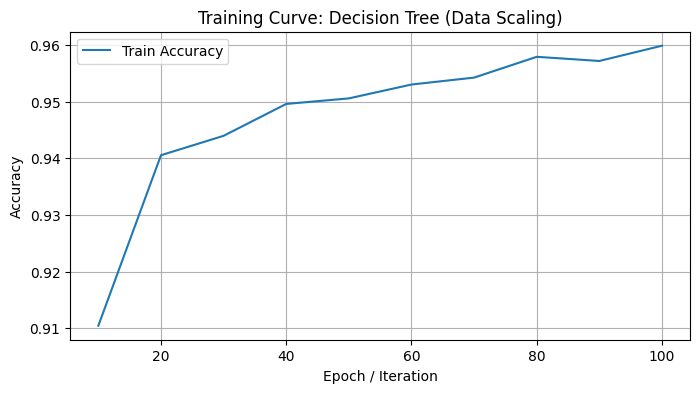

In [29]:
from sklearn.tree import DecisionTreeClassifier

model_name = "Decision Tree"
history = {'epoch': [], 'train_acc': []}

for i in range(1, 11):
    size = int((i/10) * len(X_train_transformed))
    clf = DecisionTreeClassifier(max_depth=7, random_state=42)
    clf.fit(X_train_transformed[:size], y_train[:size])
    history['epoch'].append(i * 10) # Represents % of data
    history['train_acc'].append(clf.score(X_train_transformed, y_train))

y_pred = clf.predict(X_test_transformed)
y_prob = clf.predict_proba(X_test_transformed)[:, 1]
metrics = get_metrics(y_test, y_pred, y_prob)

plot_training_curve(history, f"{model_name} (Data Scaling)")
joblib.dump(clf, 'decision_tree.joblib')
update_metadata(model_name, str(clf.get_params()), metrics, history, 'decision_tree.joblib')

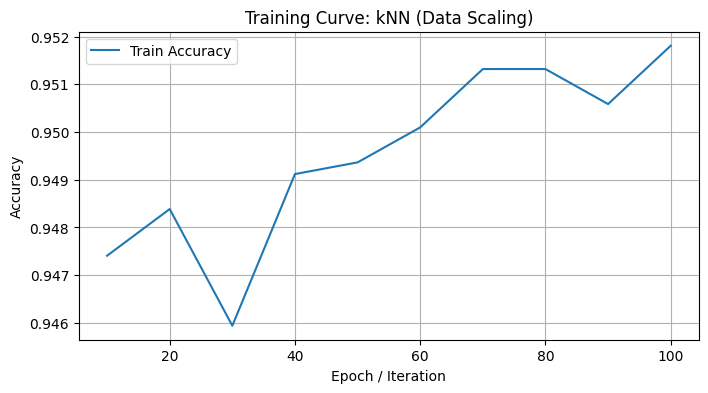

In [30]:
from sklearn.neighbors import KNeighborsClassifier

model_name = "kNN"
history = {'epoch': [], 'train_acc': []}

for i in range(1, 11):
    size = int((i/10) * len(X_train_transformed))
    clf = KNeighborsClassifier(n_neighbors=5)
    clf.fit(X_train_transformed[:size], y_train[:size])
    history['epoch'].append(i * 10)
    history['train_acc'].append(clf.score(X_train_transformed, y_train))

y_pred = clf.predict(X_test_transformed)
y_prob = clf.predict_proba(X_test_transformed)[:, 1]
metrics = get_metrics(y_test, y_pred, y_prob)

plot_training_curve(history, f"{model_name} (Data Scaling)")
joblib.dump(clf, 'knn.joblib')
update_metadata(model_name, str(clf.get_params()), metrics, history, 'knn.joblib')

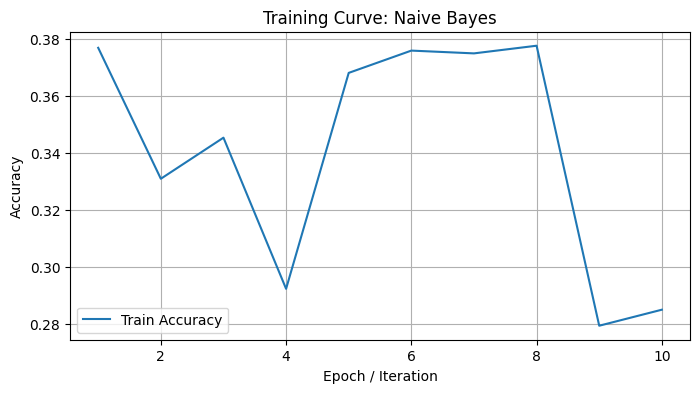

In [31]:
from sklearn.naive_bayes import GaussianNB

model_name = "Naive Bayes"
clf = GaussianNB()
epochs = 10
history = {'epoch': [], 'train_acc': []}

X_chunks = np.array_split(X_train_transformed, epochs)
y_chunks = np.array_split(y_train, epochs)

for i in range(epochs):
    clf.partial_fit(X_chunks[i], y_chunks[i], classes=np.unique(y_train))
    history['epoch'].append(i+1)
    history['train_acc'].append(clf.score(X_train_transformed, y_train))

y_pred = clf.predict(X_test_transformed)
y_prob = clf.predict_proba(X_test_transformed)[:, 1]
metrics = get_metrics(y_test, y_pred, y_prob)

plot_training_curve(history, model_name)
joblib.dump(clf, 'naive_bayes.joblib')
update_metadata(model_name, str(clf.get_params()), metrics, history, 'naive_bayes.joblib')

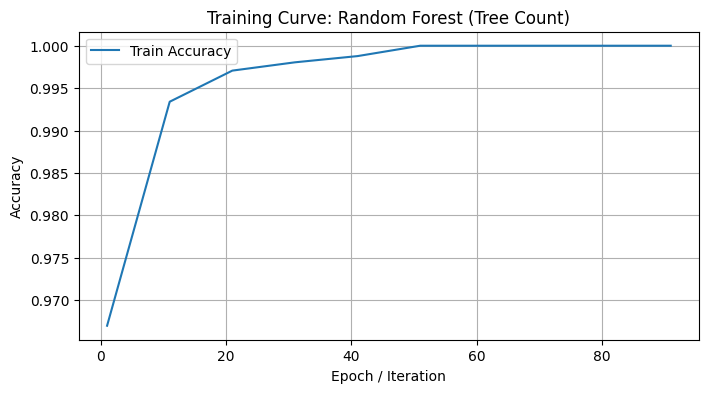

In [32]:
from sklearn.ensemble import RandomForestClassifier

model_name = "Random Forest"
clf = RandomForestClassifier(n_estimators=1, warm_start=True, random_state=42)
history = {'epoch': [], 'train_acc': []}

for i in range(1, 101, 10): # Increment by 10 trees
    clf.n_estimators = i
    clf.fit(X_train_transformed, y_train)
    history['epoch'].append(i)
    history['train_acc'].append(clf.score(X_train_transformed, y_train))

y_pred = clf.predict(X_test_transformed)
y_prob = clf.predict_proba(X_test_transformed)[:, 1]
metrics = get_metrics(y_test, y_pred, y_prob)

plot_training_curve(history, f"{model_name} (Tree Count)")
joblib.dump(clf, 'random_forest.joblib')
update_metadata(model_name, str(clf.get_params()), metrics, history, 'random_forest.joblib')

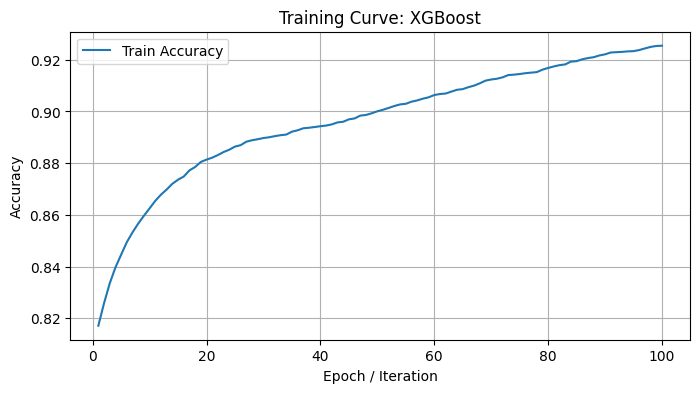

In [36]:
from xgboost import XGBClassifier

model_name = "XGBoost"
clf = XGBClassifier(n_estimators=100, learning_rate=0.1)

# XGBoost can track internal metrics per iteration
clf.fit(X_train_transformed, y_train, 
        eval_set=[(X_train_transformed, y_train)],
        verbose=False)

results = clf.evals_result()
# Invert error to get accuracy for the curve
history = {
    'epoch': list(range(1, 101)),
    'train_acc': [1 - x for x in results['validation_0']['logloss']]
}

y_pred = clf.predict(X_test_transformed)
y_prob = clf.predict_proba(X_test_transformed)[:, 1]
metrics = get_metrics(y_test, y_pred, y_prob)

plot_training_curve(history, model_name)
joblib.dump(clf, 'xgboost.joblib')
update_metadata(model_name, str(clf.get_params()), metrics, history, 'xgboost.joblib')